<a href="https://colab.research.google.com/github/aditya-chavda/TSF-Internship-Tasks/blob/master/Task4_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: To Explore Decision Tree Algorithm 

Description: In this task, from the given ‘Iris’ dataset, we have to create and visualise a decision tree classification, and then predict right class on the new data.

## Author: Aditya Chavda
####Date created: 24th September, 2020
This notebook is created to complete the above stated task given as part of data science internship under The Sparks Foundation.

####Importing Libraries and the Data

In [8]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [84]:
#Reading from the provided dataset
df = pd.read_csv('Iris.csv')

feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
xi = pd.DataFrame(df.iloc[:, [1,2,3,4]], columns=feature_names)
yi = pd.DataFrame(df.iloc[:, [5]], columns=['Species'])
yi['Species'] = yi['Species'].map({k:i for i,k in enumerate(species_names)})

#Spliting data into train and test set
train_X, test_X, train_Y, test_Y = train_test_split(xi, yi, train_size=0.7)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Choosing right features to fit Decision Tree

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

Reference: Scikit-learn documentation (https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)

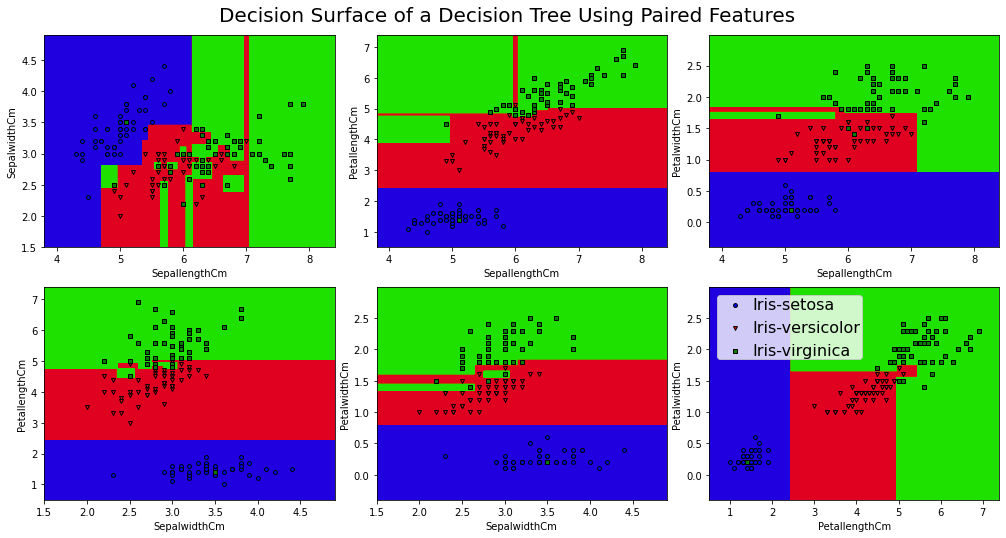

In [99]:
plt.figure(figsize=(15,8))

models = []
# Enumerating over the each possible pairs of features
for pi, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3]]):

    X, y = xi.iloc[:, pair].values , yi.values
    
    model = DecisionTreeClassifier().fit(X, y)
    models.append(model)
    
    # Plotting two row by three column subplot 
    plt.subplot(2, 3, pi + 1)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 4.0)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    plt.xlabel(feature_names[pair[0]].title()[0:-4] + feature_names[pair[0]][-4:])
    plt.ylabel(feature_names[pair[1]].title()[0:-4] + feature_names[pair[1]][-4:])
    
    # Plotting the training points for each species
    for i, color, marker in zip(range(len(species_names)), 'brg', 'ovs'):
        index = np.where(y == i)
        plt.scatter(X[index, 0], X[index, 1], c = color, marker = marker,
                    label = species_names[i], cmap = plt.cm.brg, 
                    edgecolor = 'black', s = 15)

plt.suptitle('Decision Surface of a Decision Tree Using Paired Features', size = 20)
plt.legend(fontsize = 16, borderpad = 0.1, handletextpad = 0.1 )
plt.axis("tight")
plt.show()

As you can see in above plots, there are some small islands (or peninsulas) generated which shows the tendency of Decision tree models to overfit the data.

Also, with only two parameters, a very high degree of accuracy is achievable in the last subplot using only petal length and petal width with only a single modest and sensibly positioned peninsula.

####Finding optimal depth for Decision Tree Classification
using kfold cross validation method

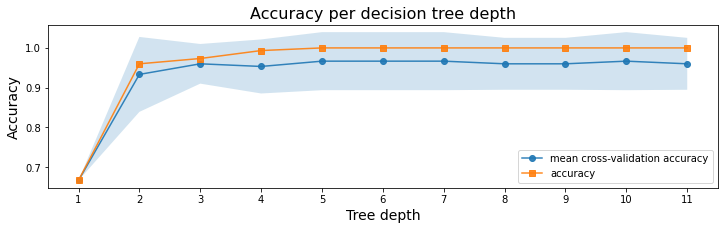

In [100]:
# Fitting trees of various depths on the training data using cross-validation
cv_scores_list = []
cv_scores_std = []
cv_scores_mean = []
accuracy_scores = []

# Fitting trees of depth 1 to 12
for depth in range(1,12):
  model = DecisionTreeClassifier(max_depth=depth)
  cv_scores = cross_val_score(model, xi, yi, scoring='accuracy')
  cv_scores_list.append(cv_scores)
  cv_scores_mean.append(cv_scores.mean())
  cv_scores_std.append(cv_scores.std())
  accuracy_scores.append(model.fit(xi, yi).score(xi, yi))
cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)
accuracy_scores = np.array(accuracy_scores)

# Plotting cross-validation results
fig, ax = plt.subplots(1,1, figsize=(12,3))
ax.plot(range(1,12), cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.fill_between(range(1,12), cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
ylim = plt.ylim()
ax.plot(range(1,12), accuracy_scores, '-s', label='accuracy', alpha=0.9)
ax.set_title('Accuracy per decision tree depth', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(ylim)
ax.set_xticks(range(1,12))
ax.legend()

In [101]:
# Printing the depth of the tree which achieves the best mean cross-validation accuracy
idx_max = cv_scores_mean.argmax()
sm_best_tree_depth = range(1,12)[idx_max]
sm_best_tree_cv_score = cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-5 tree achieves the best mean cross-validation accuracy 96.66667 +/- 3.65148% on training dataset


####Decision Tree algorithm using the best parameters

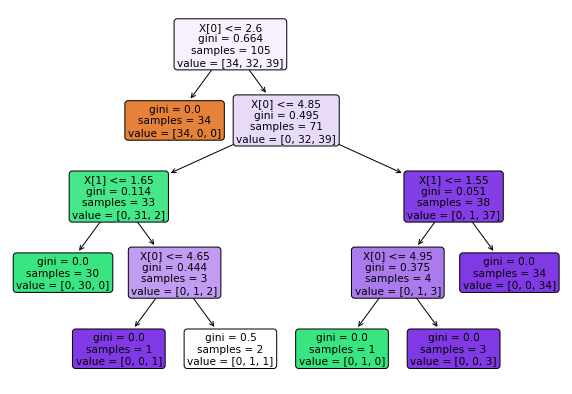

In [122]:
model = DecisionTreeClassifier(max_depth = sm_best_tree_depth)
model.fit(train_X.iloc[:,[2,3]],train_Y)

# Plotting the decision tree
plt.figure(figsize = (10,7))
plot_tree(model, rounded = True, filled = True)
plt.show()

Gini Impurity measures the divergences between the probability distributions of the target attribute’s values and splits a node such that it gives the least amount of impurity.

A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist.

The value list tells you how many samples at the given node fall into each category. 

The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value.

####Testing Accuracy on train and test set

In [103]:
print('Accuracy on train set:',model.score(train_X.iloc[:,[2,3]],train_Y))
print('Accuracy on test set:',model.score(test_X.iloc[:,[2,3]],test_Y))

Accuracy on train set: 0.9904761904761905
Accuracy on test set: 0.9333333333333333


####Making prediction from test set and comparing the outcome

In [120]:
# Comparing Actual vs Predicted
y_pred = model.predict(test_X.iloc[:,[2,3]])
df = pd.DataFrame({'Actual': test_Y.iloc[:,0].values, 'Predicted': y_pred, 'Same?': test_Y.iloc[:,0].values == y_pred})  

print('Total values predicted wrong:',sum(df['Same?']==False))
df.head()

Total values predicted wrong: 3


,Actual,Predicted,Same?
0,1,1,True
1,1,1,True
2,0,0,True
3,1,1,True
4,2,2,True
